<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [MNIST1] - Simple classification with DNN
<!-- DESC --> An example of classification using a dense neural network for the famous MNIST dataset
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Recognizing handwritten numbers
 - Understanding the principle of a classifier DNN network 
 - Implementation with Keras 


The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology) is a must for Deep Learning.  
It consists of 60,000 small images of handwritten numbers for learning and 10,000 for testing.


## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Create a model
 - Train the model
 - Evaluate the result


## Step 1 - Init python stuff

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload

sys.path.append('..')
import fidle.pwk as pwk

datasets_dir = pwk.init('MNIST1')

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.5
Notebook id          : MNIST1
Run time             : Tuesday 26 January 2021, 11:06:01
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Datasets dir         : /home/pjluc/tmp/datasets
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


## Step 2 - Retrieve data
MNIST is one of the most famous historic dataset.  
Include in [Keras datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


## Step 3 - Preparing the data

In [3]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255


After normalization  : Min=0.0, max=1.0


### Have a look

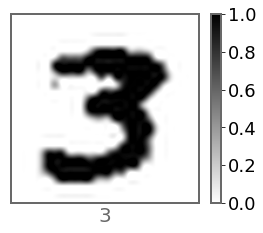

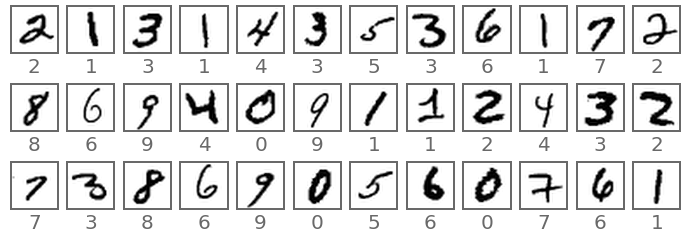

In [4]:
pwk.plot_images(x_train, y_train, [27],  x_size=5,y_size=5, colorbar=True, save_as='01-one-digit')
pwk.plot_images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')

## Step 4 - Create model
About informations about : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [5]:
hidden1     = 100
hidden2     = 100

model = keras.Sequential([
    keras.layers.Input((28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense( hidden1, activation='relu'),
    keras.layers.Dense( hidden2, activation='relu'),
    keras.layers.Dense( 10,      activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Step 5 - Train the model

In [6]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

Epoch 1/16


  1/118 [..............................] - ETA: 0s - loss: 2.3471 - accuracy: 0.0801

  6/118 [>.............................] - ETA: 0s - loss: 2.1382 - accuracy: 0.3034

 16/118 [===>..........................] - ETA: 0s - loss: 1.7215 - accuracy: 0.5464

 27/118 [=====>........................] - ETA: 0s - loss: 1.3412 - accuracy: 0.6557

 39/118 [========>.....................] - ETA: 0s - loss: 1.0861 - accuracy: 0.7192

 51/118 [===========>..................] - ETA: 0s - loss: 0.9212 - accuracy: 0.7598

 65/118 [===============>..............] - ETA: 0s - loss: 0.7983 - accuracy: 0.7898

 79/118 [===================>..........] - ETA: 0s - loss: 0.7145 - accuracy: 0.8105

 93/118 [======================>.......] - ETA: 0s - loss: 0.6522 - accuracy: 0.8258

108/118 [==========================>...] - ETA: 0s - loss: 0.5994 - accuracy: 0.8394

118/118 [==============================] - 1s 6ms/step - loss: 0.5722 - accuracy: 0.8464 - val_loss: 0.2546 - val_accuracy: 0.9239


Epoch 2/16
  1/118 [..............................] - ETA: 0s - loss: 0.3287 - accuracy: 0.9219

 14/118 [==>...........................] - ETA: 0s - loss: 0.2494 - accuracy: 0.9307

 27/118 [=====>........................] - ETA: 0s - loss: 0.2510 - accuracy: 0.9285

 40/118 [=========>....................] - ETA: 0s - loss: 0.2469 - accuracy: 0.9302

 54/118 [============>.................] - ETA: 0s - loss: 0.2398 - accuracy: 0.9319

 68/118 [================>.............] - ETA: 0s - loss: 0.2352 - accuracy: 0.9332

 82/118 [===================>..........] - ETA: 0s - loss: 0.2317 - accuracy: 0.9337

 96/118 [=======================>......] - ETA: 0s - loss: 0.2258 - accuracy: 0.9354

111/118 [===========================>..] - ETA: 0s - loss: 0.2204 - accuracy: 0.9365

118/118 [==============================] - 1s 4ms/step - loss: 0.2182 - accuracy: 0.9372 - val_loss: 0.1808 - val_accuracy: 0.9464


Epoch 3/16
  1/118 [..............................] - ETA: 0s - loss: 0.2043 - accuracy: 0.9336

 14/118 [==>...........................] - ETA: 0s - loss: 0.1757 - accuracy: 0.9487

 28/118 [======>.......................] - ETA: 0s - loss: 0.1719 - accuracy: 0.9489

 42/118 [=========>....................] - ETA: 0s - loss: 0.1685 - accuracy: 0.9504

 56/118 [=============>................] - ETA: 0s - loss: 0.1714 - accuracy: 0.9498

 71/118 [=================>............] - ETA: 0s - loss: 0.1692 - accuracy: 0.9503

 86/118 [====================>.........] - ETA: 0s - loss: 0.1679 - accuracy: 0.9511

101/118 [========================>.....] - ETA: 0s - loss: 0.1652 - accuracy: 0.9517

116/118 [============================>.] - ETA: 0s - loss: 0.1628 - accuracy: 0.9521

118/118 [==============================] - 0s 4ms/step - loss: 0.1624 - accuracy: 0.9523 - val_loss: 0.1435 - val_accuracy: 0.9564


Epoch 4/16
  1/118 [..............................] - ETA: 0s - loss: 0.1724 - accuracy: 0.9531

 15/118 [==>...........................] - ETA: 0s - loss: 0.1399 - accuracy: 0.9586

 29/118 [======>.......................] - ETA: 0s - loss: 0.1350 - accuracy: 0.9591

 43/118 [=========>....................] - ETA: 0s - loss: 0.1331 - accuracy: 0.9598

 57/118 [=============>................] - ETA: 0s - loss: 0.1332 - accuracy: 0.9599

 71/118 [=================>............] - ETA: 0s - loss: 0.1315 - accuracy: 0.9607

 86/118 [====================>.........] - ETA: 0s - loss: 0.1310 - accuracy: 0.9609

100/118 [========================>.....] - ETA: 0s - loss: 0.1299 - accuracy: 0.9615

115/118 [============================>.] - ETA: 0s - loss: 0.1295 - accuracy: 0.9618

118/118 [==============================] - 0s 4ms/step - loss: 0.1294 - accuracy: 0.9619 - val_loss: 0.1232 - val_accuracy: 0.9641


Epoch 5/16
  1/118 [..............................] - ETA: 0s - loss: 0.0918 - accuracy: 0.9766

 14/118 [==>...........................] - ETA: 0s - loss: 0.1141 - accuracy: 0.9668

 28/118 [======>.......................] - ETA: 0s - loss: 0.1142 - accuracy: 0.9666

 42/118 [=========>....................] - ETA: 0s - loss: 0.1123 - accuracy: 0.9671

 55/118 [============>.................] - ETA: 0s - loss: 0.1090 - accuracy: 0.9683

 69/118 [================>.............] - ETA: 0s - loss: 0.1070 - accuracy: 0.9688

 83/118 [====================>.........] - ETA: 0s - loss: 0.1073 - accuracy: 0.9687

 97/118 [=======================>......] - ETA: 0s - loss: 0.1063 - accuracy: 0.9689

111/118 [===========================>..] - ETA: 0s - loss: 0.1060 - accuracy: 0.9690

118/118 [==============================] - 1s 4ms/step - loss: 0.1058 - accuracy: 0.9691 - val_loss: 0.1112 - val_accuracy: 0.9670


Epoch 6/16


  1/118 [..............................] - ETA: 0s - loss: 0.0788 - accuracy: 0.9785

 14/118 [==>...........................] - ETA: 0s - loss: 0.0902 - accuracy: 0.9739

 27/118 [=====>........................] - ETA: 0s - loss: 0.0922 - accuracy: 0.9732

 40/118 [=========>....................] - ETA: 0s - loss: 0.0920 - accuracy: 0.9733

 54/118 [============>.................] - ETA: 0s - loss: 0.0923 - accuracy: 0.9731

 69/118 [================>.............] - ETA: 0s - loss: 0.0917 - accuracy: 0.9735

 83/118 [====================>.........] - ETA: 0s - loss: 0.0914 - accuracy: 0.9736

 98/118 [=======================>......] - ETA: 0s - loss: 0.0903 - accuracy: 0.9736

113/118 [===========================>..] - ETA: 0s - loss: 0.0896 - accuracy: 0.9738

118/118 [==============================] - 0s 4ms/step - loss: 0.0894 - accuracy: 0.9739 - val_loss: 0.0986 - val_accuracy: 0.9686


Epoch 7/16
  1/118 [..............................] - ETA: 0s - loss: 0.0484 - accuracy: 0.9844

 15/118 [==>...........................] - ETA: 0s - loss: 0.0739 - accuracy: 0.9777

 29/118 [======>.......................] - ETA: 0s - loss: 0.0763 - accuracy: 0.9772

 43/118 [=========>....................] - ETA: 0s - loss: 0.0769 - accuracy: 0.9765

 56/118 [=============>................] - ETA: 0s - loss: 0.0784 - accuracy: 0.9760

 71/118 [=================>............] - ETA: 0s - loss: 0.0793 - accuracy: 0.9760

 86/118 [====================>.........] - ETA: 0s - loss: 0.0804 - accuracy: 0.9755

102/118 [========================>.....] - ETA: 0s - loss: 0.0791 - accuracy: 0.9762

118/118 [==============================] - ETA: 0s - loss: 0.0785 - accuracy: 0.9764

118/118 [==============================] - 1s 4ms/step - loss: 0.0785 - accuracy: 0.9764 - val_loss: 0.0968 - val_accuracy: 0.9687


Epoch 8/16


  1/118 [..............................] - ETA: 0s - loss: 0.0510 - accuracy: 0.9863

 15/118 [==>...........................] - ETA: 0s - loss: 0.0659 - accuracy: 0.9798

 29/118 [======>.......................] - ETA: 0s - loss: 0.0679 - accuracy: 0.9801

 44/118 [==========>...................] - ETA: 0s - loss: 0.0682 - accuracy: 0.9802

 60/118 [==============>...............] - ETA: 0s - loss: 0.0679 - accuracy: 0.9804

 76/118 [==================>...........] - ETA: 0s - loss: 0.0665 - accuracy: 0.9810

 92/118 [======================>.......] - ETA: 0s - loss: 0.0671 - accuracy: 0.9808

108/118 [==========================>...] - ETA: 0s - loss: 0.0669 - accuracy: 0.9808

118/118 [==============================] - 1s 4ms/step - loss: 0.0669 - accuracy: 0.9806 - val_loss: 0.0895 - val_accuracy: 0.9717


Epoch 9/16
  1/118 [..............................] - ETA: 0s - loss: 0.0547 - accuracy: 0.9922

 14/118 [==>...........................] - ETA: 0s - loss: 0.0634 - accuracy: 0.9809

 27/118 [=====>........................] - ETA: 0s - loss: 0.0612 - accuracy: 0.9819

 40/118 [=========>....................] - ETA: 0s - loss: 0.0616 - accuracy: 0.9819

 53/118 [============>.................] - ETA: 0s - loss: 0.0607 - accuracy: 0.9814

 66/118 [===============>..............] - ETA: 0s - loss: 0.0613 - accuracy: 0.9815

 79/118 [===================>..........] - ETA: 0s - loss: 0.0611 - accuracy: 0.9814

 92/118 [======================>.......] - ETA: 0s - loss: 0.0622 - accuracy: 0.9813

105/118 [=========================>....] - ETA: 0s - loss: 0.0614 - accuracy: 0.9817

118/118 [==============================] - ETA: 0s - loss: 0.0610 - accuracy: 0.9818

118/118 [==============================] - 1s 6ms/step - loss: 0.0610 - accuracy: 0.9818 - val_loss: 0.0881 - val_accuracy: 0.9728


Epoch 10/16
  1/118 [..............................] - ETA: 0s - loss: 0.0347 - accuracy: 0.9922

 14/118 [==>...........................] - ETA: 0s - loss: 0.0466 - accuracy: 0.9862

 27/118 [=====>........................] - ETA: 0s - loss: 0.0493 - accuracy: 0.9860

 40/118 [=========>....................] - ETA: 0s - loss: 0.0497 - accuracy: 0.9853

 53/118 [============>.................] - ETA: 0s - loss: 0.0496 - accuracy: 0.9854

 67/118 [================>.............] - ETA: 0s - loss: 0.0500 - accuracy: 0.9851

 80/118 [===================>..........] - ETA: 0s - loss: 0.0500 - accuracy: 0.9852

 93/118 [======================>.......] - ETA: 0s - loss: 0.0504 - accuracy: 0.9852

107/118 [==========================>...] - ETA: 0s - loss: 0.0513 - accuracy: 0.9849

118/118 [==============================] - 1s 6ms/step - loss: 0.0517 - accuracy: 0.9847 - val_loss: 0.0875 - val_accuracy: 0.9732


Epoch 11/16
  1/118 [..............................] - ETA: 0s - loss: 0.0657 - accuracy: 0.9688

 14/118 [==>...........................] - ETA: 0s - loss: 0.0498 - accuracy: 0.9848

 27/118 [=====>........................] - ETA: 0s - loss: 0.0471 - accuracy: 0.9865

 40/118 [=========>....................] - ETA: 0s - loss: 0.0473 - accuracy: 0.9871

 53/118 [============>.................] - ETA: 0s - loss: 0.0475 - accuracy: 0.9868

 66/118 [===============>..............] - ETA: 0s - loss: 0.0470 - accuracy: 0.9864

 79/118 [===================>..........] - ETA: 0s - loss: 0.0465 - accuracy: 0.9866

 92/118 [======================>.......] - ETA: 0s - loss: 0.0465 - accuracy: 0.9865

105/118 [=========================>....] - ETA: 0s - loss: 0.0462 - accuracy: 0.9868

118/118 [==============================] - 1s 6ms/step - loss: 0.0466 - accuracy: 0.9865 - val_loss: 0.0778 - val_accuracy: 0.9755


Epoch 12/16
  1/118 [..............................] - ETA: 0s - loss: 0.0301 - accuracy: 0.9961

 14/118 [==>...........................] - ETA: 0s - loss: 0.0408 - accuracy: 0.9891

 27/118 [=====>........................] - ETA: 0s - loss: 0.0413 - accuracy: 0.9888

 39/118 [========>.....................] - ETA: 0s - loss: 0.0419 - accuracy: 0.9888

 52/118 [============>.................] - ETA: 0s - loss: 0.0410 - accuracy: 0.9888

 65/118 [===============>..............] - ETA: 0s - loss: 0.0400 - accuracy: 0.9890

 78/118 [==================>...........] - ETA: 0s - loss: 0.0407 - accuracy: 0.9886

 91/118 [======================>.......] - ETA: 0s - loss: 0.0411 - accuracy: 0.9885

104/118 [=========================>....] - ETA: 0s - loss: 0.0413 - accuracy: 0.9883

118/118 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9883

118/118 [==============================] - 1s 5ms/step - loss: 0.0413 - accuracy: 0.9883 - val_loss: 0.0879 - val_accuracy: 0.9732


Epoch 13/16
  1/118 [..............................] - ETA: 0s - loss: 0.0354 - accuracy: 0.9902

 15/118 [==>...........................] - ETA: 0s - loss: 0.0383 - accuracy: 0.9891

 29/118 [======>.......................] - ETA: 0s - loss: 0.0413 - accuracy: 0.9886

 43/118 [=========>....................] - ETA: 0s - loss: 0.0394 - accuracy: 0.9889

 57/118 [=============>................] - ETA: 0s - loss: 0.0382 - accuracy: 0.9889

 72/118 [=================>............] - ETA: 0s - loss: 0.0377 - accuracy: 0.9891

 87/118 [=====================>........] - ETA: 0s - loss: 0.0387 - accuracy: 0.9888

102/118 [========================>.....] - ETA: 0s - loss: 0.0384 - accuracy: 0.9888

117/118 [============================>.] - ETA: 0s - loss: 0.0386 - accuracy: 0.9887

118/118 [==============================] - 0s 4ms/step - loss: 0.0386 - accuracy: 0.9887 - val_loss: 0.0819 - val_accuracy: 0.9737


Epoch 14/16
  1/118 [..............................] - ETA: 0s - loss: 0.0368 - accuracy: 0.9844

 16/118 [===>..........................] - ETA: 0s - loss: 0.0340 - accuracy: 0.9902

 31/118 [======>.......................] - ETA: 0s - loss: 0.0314 - accuracy: 0.9917

 46/118 [==========>...................] - ETA: 0s - loss: 0.0319 - accuracy: 0.9910

 61/118 [==============>...............] - ETA: 0s - loss: 0.0333 - accuracy: 0.9905

 76/118 [==================>...........] - ETA: 0s - loss: 0.0338 - accuracy: 0.9902

 91/118 [======================>.......] - ETA: 0s - loss: 0.0342 - accuracy: 0.9901

106/118 [=========================>....] - ETA: 0s - loss: 0.0346 - accuracy: 0.9900

118/118 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9902 - val_loss: 0.0798 - val_accuracy: 0.9752


Epoch 15/16
  1/118 [..............................] - ETA: 0s - loss: 0.0317 - accuracy: 0.9941

 15/118 [==>...........................] - ETA: 0s - loss: 0.0319 - accuracy: 0.9898

 29/118 [======>.......................] - ETA: 0s - loss: 0.0304 - accuracy: 0.9910

 44/118 [==========>...................] - ETA: 0s - loss: 0.0299 - accuracy: 0.9917

 60/118 [==============>...............] - ETA: 0s - loss: 0.0293 - accuracy: 0.9920

 76/118 [==================>...........] - ETA: 0s - loss: 0.0298 - accuracy: 0.9918

 92/118 [======================>.......] - ETA: 0s - loss: 0.0294 - accuracy: 0.9920

108/118 [==========================>...] - ETA: 0s - loss: 0.0292 - accuracy: 0.9921

118/118 [==============================] - 0s 4ms/step - loss: 0.0296 - accuracy: 0.9919 - val_loss: 0.0774 - val_accuracy: 0.9766


Epoch 16/16


  1/118 [..............................] - ETA: 0s - loss: 0.0262 - accuracy: 0.9902

 14/118 [==>...........................] - ETA: 0s - loss: 0.0279 - accuracy: 0.9919

 24/118 [=====>........................] - ETA: 0s - loss: 0.0269 - accuracy: 0.9924

 39/118 [========>.....................] - ETA: 0s - loss: 0.0277 - accuracy: 0.9921

 55/118 [============>.................] - ETA: 0s - loss: 0.0278 - accuracy: 0.9923

 71/118 [=================>............] - ETA: 0s - loss: 0.0281 - accuracy: 0.9922

 87/118 [=====================>........] - ETA: 0s - loss: 0.0282 - accuracy: 0.9921

103/118 [=========================>....] - ETA: 0s - loss: 0.0275 - accuracy: 0.9923

118/118 [==============================] - 0s 4ms/step - loss: 0.0272 - accuracy: 0.9923 - val_loss: 0.0807 - val_accuracy: 0.9755


## Step 6 - Evaluate
### 6.1 - Final loss and accuracy

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.08066742867231369
Test accuracy : 0.9754999876022339


### 6.2 - Plot history

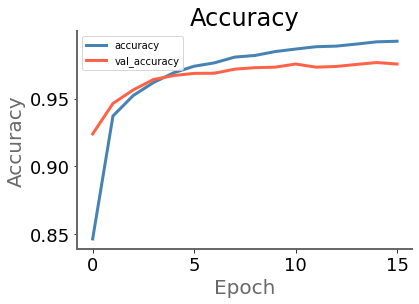

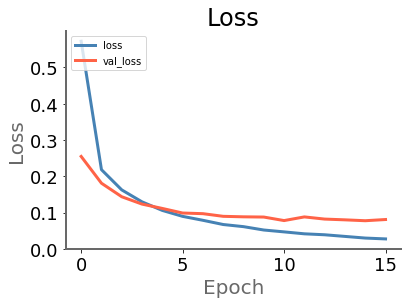

In [8]:
pwk.plot_history(history, figsize=(6,4), save_as='03-history')

### 6.3 - Plot results

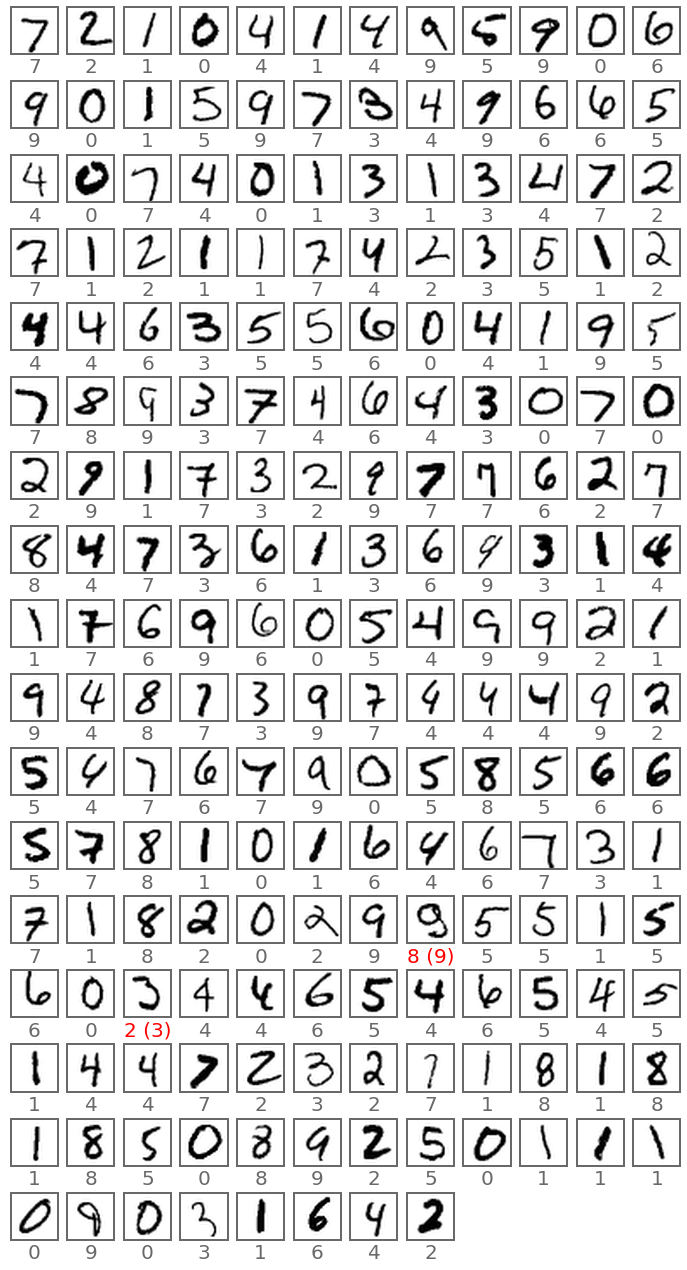

In [9]:
#y_pred   = model.predict_classes(x_test)           Deprecated after 01/01/2021 !!

y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

pwk.plot_images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

### 6.4 - Plot some errors

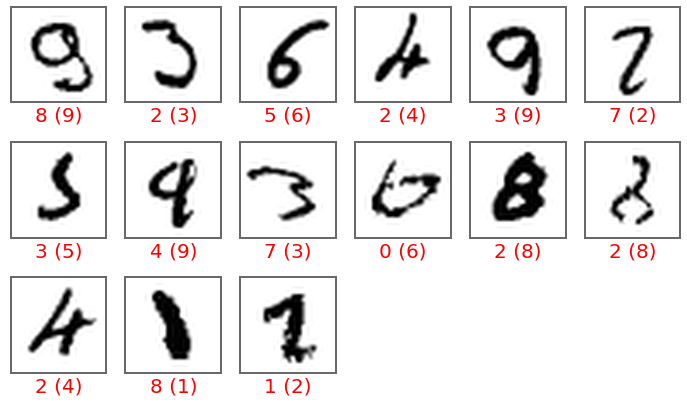

In [10]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
pwk.plot_images(x_test, y_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')

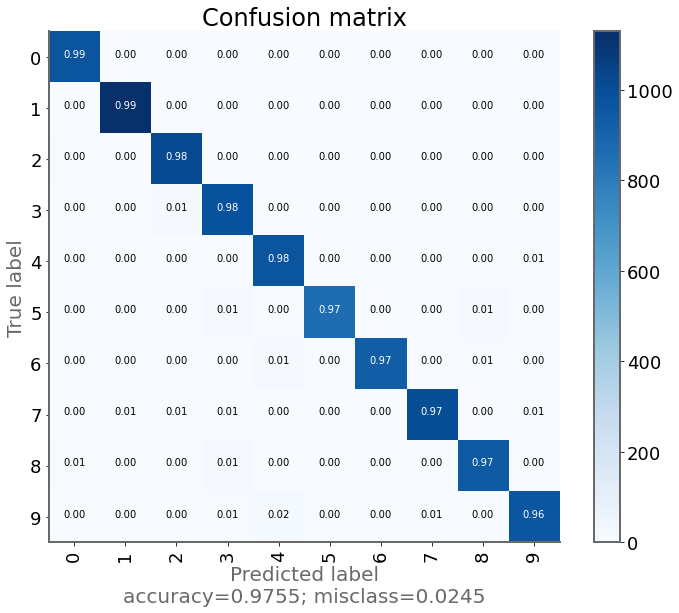

In [11]:
pwk.plot_confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')

In [12]:
pwk.end()

End time is : Tuesday 26 January 2021, 11:06:33
Duration is : 00:00:32 455ms
This notebook ends here


<div class="todo">
    A few things you can do for fun:
    <ul>
        <li>Changing the network architecture (layers, number of neurons, etc.)</li>
        <li>Display a summary of the network</li>
        <li>Retrieve and display the softmax output of the network, to evaluate its "doubts".</li>
    </ul>
</div>

---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>